In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import numpy.random as random
# packages for SVM support
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def graph(Cvalue, IsLinear, idx):
    mycolor = {0:'r', 1:'g', 2: 'b', 3:'c', 4: 'y', 5: 'k'}
    
    if IsLinear == False: return

    plt.figure(figsize=(4, 4))
    xmin=-10; xmax=20
    ymin=-10; ymax=20
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    Xcolor = [ mycolor[i] for i in y]
    plt.scatter(X[:,0], X[:,1], c = Xcolor) #點
    
    for i in range(5):
        if idx[i] == 0:
            plt.scatter(PredictPoints[i,0], PredictPoints[i,1], c = mycolor[0])
            print('Point', i+1, 'is predicted in class 1, all probability as below', prob[i])
        elif idx[i] == 1:
            plt.scatter(PredictPoints[i,0], PredictPoints[i,1], c = mycolor[1])
            print('Point', i+1, 'is predicted in class 2, all probability as below', prob[i])
        elif idx[i] == 2:
            plt.scatter(PredictPoints[i,0], PredictPoints[i,1], c = mycolor[2])
            print('Point', i+1, 'is predicted in class 3, all probability as below', prob[i])
        elif idx[i] == 3:
            plt.scatter(PredictPoints[i,0], PredictPoints[i,1], c = mycolor[3])
            print('Point', i+1, 'is predicted in class 4, all probability as below', prob[i])
            
#     for i in range(6):
#         GX = random.uniform(-10, 10, 100)
#         GY = -1.0 * model.coef_[i, 0] * GX / model.coef_[i, 1] - model.intercept_[i]/ model.coef_[i, 1]
#         plt.plot(GX,GY, c=mycolor[i]) #線
    plt.title('Cvalue = ' + str(Cvalue))
    plt.show()
    return

Cvalue =  0.01 train time = 0.0020008087158203125
Point 1 is predicted in class 1, all probability as below [9.99945453e-01 2.32545381e-05 1.99095408e-05 1.13832289e-05]
Point 2 is predicted in class 2, all probability as below [2.99280382e-09 9.99966988e-01 1.17535107e-05 2.12554426e-05]
Point 3 is predicted in class 3, all probability as below [2.22633098e-09 1.17277488e-09 9.99981677e-01 1.83193676e-05]
Point 4 is predicted in class 4, all probability as below [1.10540468e-09 2.39524395e-09 1.60431572e-09 9.99999995e-01]
Point 5 is predicted in class 3, all probability as below [0.22564012 0.21339575 0.28664755 0.27431658]


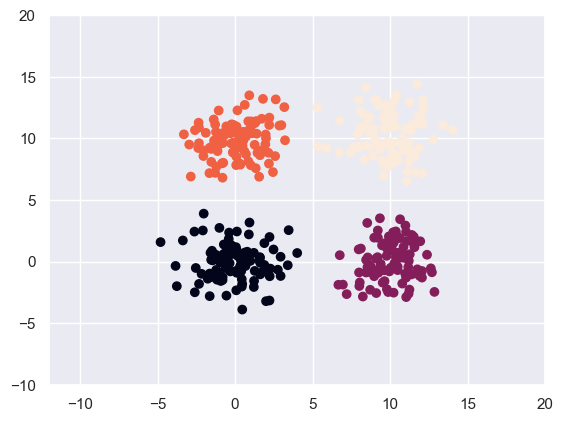

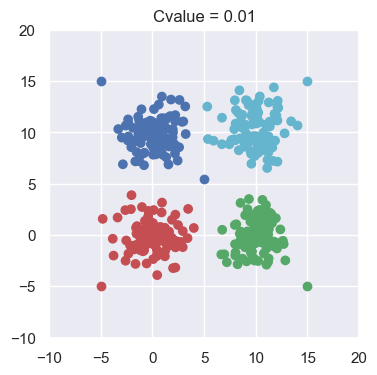

Cvalue =  0.1 train time = 0.0019986629486083984
Point 1 is predicted in class 1, all probability as below [9.99947618e-01 2.53414775e-05 1.79098541e-05 9.13059586e-06]
Point 2 is predicted in class 2, all probability as below [1.73276644e-09 9.99979858e-01 1.34094970e-05 6.73114235e-06]
Point 3 is predicted in class 3, all probability as below [1.64666335e-09 9.12893449e-10 9.99992443e-01 7.55471544e-06]
Point 4 is predicted in class 4, all probability as below [1.52001141e-09 3.34024636e-09 1.94302042e-09 9.99999993e-01]
Point 5 is predicted in class 4, all probability as below [0.28382344 0.1593105  0.22988936 0.3269767 ]


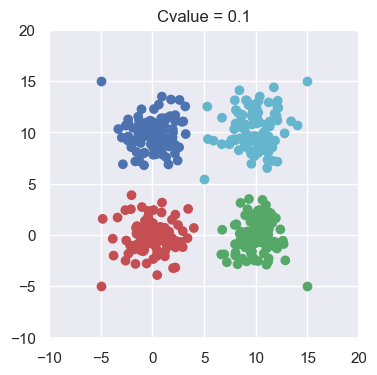

Cvalue =  1 train time = 0.0010116100311279297
Point 1 is predicted in class 1, all probability as below [9.99976098e-01 7.25312790e-06 6.29034289e-06 1.03580398e-05]
Point 2 is predicted in class 2, all probability as below [4.23403800e-09 9.99960865e-01 1.63531173e-05 2.27771787e-05]
Point 3 is predicted in class 3, all probability as below [2.49909306e-09 1.40191146e-09 9.99971501e-01 2.84948548e-05]
Point 4 is predicted in class 4, all probability as below [1.17114365e-09 2.57670389e-09 1.51592884e-09 9.99999995e-01]
Point 5 is predicted in class 3, all probability as below [0.22735163 0.21498751 0.29612727 0.26153359]


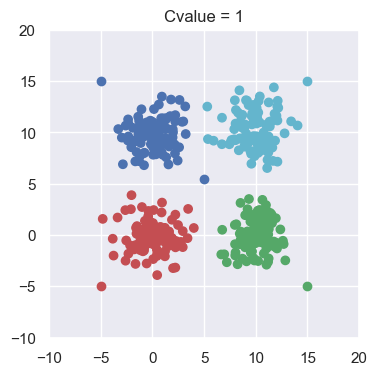

Cvalue =  10 train time = 0.0019981861114501953
Point 1 is predicted in class 1, all probability as below [9.99970383e-01 8.42923711e-06 7.84701839e-06 1.33411239e-05]
Point 2 is predicted in class 2, all probability as below [2.90716236e-09 9.99967336e-01 1.30576086e-05 1.96038234e-05]
Point 3 is predicted in class 3, all probability as below [1.88915526e-09 1.05355992e-09 9.99981159e-01 1.88381281e-05]
Point 4 is predicted in class 4, all probability as below [1.76956057e-09 3.89214453e-09 2.26431602e-09 9.99999992e-01]
Point 5 is predicted in class 3, all probability as below [0.23126413 0.22974479 0.27207923 0.26691185]


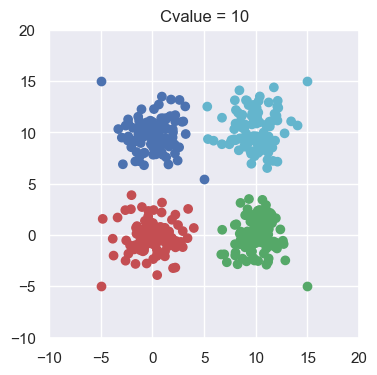

Cvalue =  100 train time = 0.0014214515686035156
Point 1 is predicted in class 1, all probability as below [9.99971498e-01 6.63965428e-06 9.98905450e-06 1.18733577e-05]
Point 2 is predicted in class 2, all probability as below [3.18216696e-09 9.99970706e-01 1.72227874e-05 1.20683893e-05]
Point 3 is predicted in class 3, all probability as below [2.71441720e-09 1.51639449e-09 9.99970724e-01 2.92713452e-05]
Point 4 is predicted in class 4, all probability as below [1.50338724e-09 3.30775971e-09 1.95607095e-09 9.99999993e-01]
Point 5 is predicted in class 3, all probability as below [0.22583327 0.21019949 0.30444377 0.25952348]


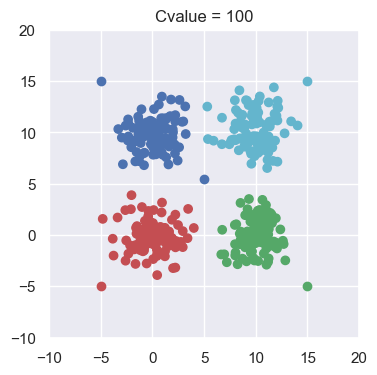

Cvalue =  1000 train time = 0.002195119857788086
Point 1 is predicted in class 1, all probability as below [9.99969593e-01 7.29638087e-06 1.03834729e-05 1.27272247e-05]
Point 2 is predicted in class 2, all probability as below [3.60321071e-09 9.99964771e-01 1.62134474e-05 1.90118066e-05]
Point 3 is predicted in class 3, all probability as below [2.15966924e-09 1.20769499e-09 9.99980078e-01 1.99185307e-05]
Point 4 is predicted in class 4, all probability as below [1.48439937e-09 3.26593491e-09 1.92413200e-09 9.99999993e-01]
Point 5 is predicted in class 3, all probability as below [0.21883671 0.21772104 0.28741147 0.27603078]


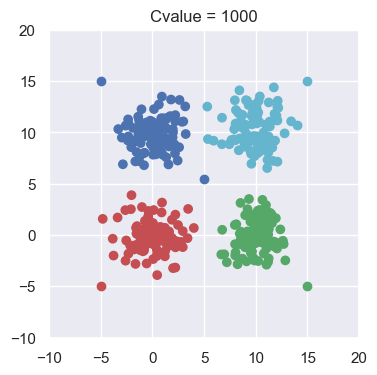

Cvalue =  10000 train time = 0.0010004043579101562
Point 1 is predicted in class 1, all probability as below [9.99968953e-01 6.42953926e-06 1.11509461e-05 1.34668324e-05]
Point 2 is predicted in class 2, all probability as below [4.33113003e-09 9.99960320e-01 1.69158928e-05 2.27601488e-05]
Point 3 is predicted in class 3, all probability as below [2.11472371e-09 1.17902740e-09 9.99980170e-01 1.98270424e-05]
Point 4 is predicted in class 4, all probability as below [1.82609172e-09 4.01784221e-09 2.37476194e-09 9.99999992e-01]
Point 5 is predicted in class 3, all probability as below [0.21596858 0.21966398 0.29431938 0.27004806]


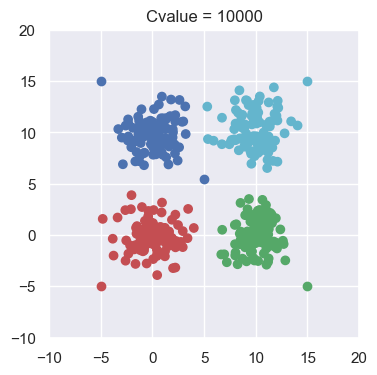

Cvalue =  100000 train time = 0.0010004043579101562
Point 1 is predicted in class 1, all probability as below [9.99971260e-01 6.13973936e-06 7.27878637e-06 1.53212407e-05]
Point 2 is predicted in class 2, all probability as below [3.75183346e-09 9.99963818e-01 1.62716860e-05 1.99065977e-05]
Point 3 is predicted in class 3, all probability as below [2.34577222e-09 1.30836333e-09 9.99974837e-01 2.51592313e-05]
Point 4 is predicted in class 4, all probability as below [2.10605420e-09 4.63363872e-09 2.72890131e-09 9.99999991e-01]
Point 5 is predicted in class 3, all probability as below [0.22737799 0.21186285 0.30120395 0.25955522]


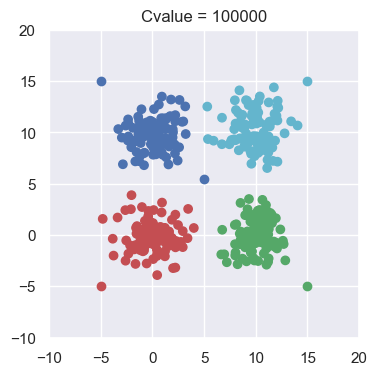

In [3]:
random.seed(2019)
N = 100
SD = 1.5
X = random.randn(N, 2) * SD + [0, 0]
XX = random.randn(N, 2) * SD + [10, 0]
XXX = random.randn(N, 2) * SD + [0, 10]
XXXX = random.randn(N, 2) * SD + [10, 10]
X = np.concatenate((X, XX, XXX, XXXX))
# X = np.concatenate((X, add))

y = [0] * N
yy = [1 ] * N
yyy = [2 ] * N
yyyy = [3 ] * N
y = np.append(y, yy)
y = np.append(y, yyy)
y = np.append(y, yyyy)
# y = np.append(y, 3)

xmin=-12; xmax=20
ymin=-10; ymax=20
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=y) #點

# results = []
PredictPoints = []
PredictPoints = PredictPoints + [[-5, -5], [15, -5], [-5, 15], [15, 15], [5, 5.5]] # manually import the predicted points
PredictPoints = np.array(PredictPoints)
# print(PredictPoints[1])
# print(PredictPoints[:,0], PredictPoints[:,1])

for Cvalue in (0.01, 0.1, 1, 10, 100, 1000, 10000, 100000):
    IsLinear = True
    model = svm.SVC(C = Cvalue, gamma=0.1, kernel='linear', probability=True)
    time_start = time.time()
    model.fit(X, y)
    print('Cvalue = ', Cvalue, 'train time =', time.time()-time_start)
    prob = model.predict_proba(PredictPoints)
#     print('probability = ', prob)
    idx = np.argmax(prob, axis = 1)
    graph(Cvalue, IsLinear, idx)
#     pred = model.predict(X)
#     result= abs(pred-y)
#     print (result.sum())
#     results = results + [[Cvalue, result.sum(), time.time()-time_start]]

Cvalue =  0.01 train time = 0.002005338668823242
Point 1 is predicted in class 1, all probability as below [0.49871685 0.00093937 0.49709829 0.00324549]
Point 2 is predicted in class 1, all probability as below [0.29810597 0.2008457  0.29416181 0.20688652]
Point 3 is predicted in class 2, all probability as below [0.26726877 0.33939341 0.17561852 0.2177193 ]
Point 4 is predicted in class 1, all probability as below [0.34155983 0.15563403 0.33996199 0.16284414]
Point 5 is predicted in class 3, all probability as below [0.22564012 0.21339575 0.28664755 0.27431658]


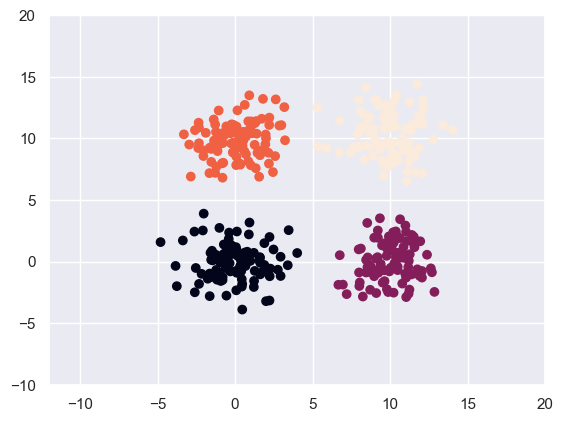

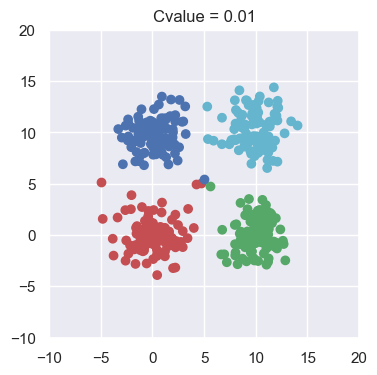

Cvalue =  0.1 train time = 0.0015115737915039062
Point 1 is predicted in class 3, all probability as below [0.45579913 0.00078432 0.53992803 0.00348852]
Point 2 is predicted in class 1, all probability as below [0.36892609 0.14667567 0.2403832  0.24401504]
Point 3 is predicted in class 1, all probability as below [0.38174216 0.23134641 0.15008841 0.23682302]
Point 4 is predicted in class 1, all probability as below [0.40023396 0.11648402 0.28418928 0.19909275]
Point 5 is predicted in class 4, all probability as below [0.28382344 0.1593105  0.22988936 0.3269767 ]


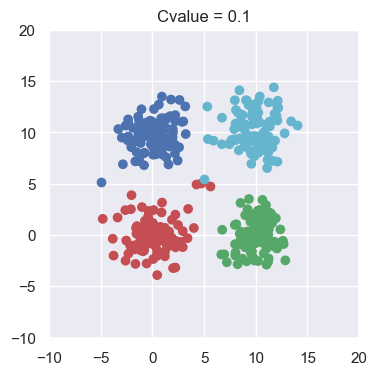

Cvalue =  1 train time = 0.0014009475708007812
Point 1 is predicted in class 1, all probability as below [0.55363817 0.00071568 0.4409538  0.00469236]
Point 2 is predicted in class 1, all probability as below [0.30541448 0.1970429  0.30216918 0.19537344]
Point 3 is predicted in class 2, all probability as below [0.26972629 0.34227744 0.18187729 0.20611898]
Point 4 is predicted in class 1, all probability as below [0.35298574 0.14861138 0.34501842 0.15338446]
Point 5 is predicted in class 3, all probability as below [0.22735163 0.21498751 0.29612727 0.26153359]


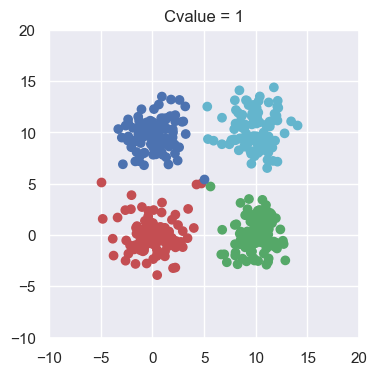

Cvalue =  10 train time = 0.001992464065551758
Point 1 is predicted in class 1, all probability as below [0.55680343 0.00070764 0.43738632 0.00510261]
Point 2 is predicted in class 1, all probability as below [0.3070399  0.21044    0.28280715 0.19971295]
Point 3 is predicted in class 2, all probability as below [0.26431691 0.36542788 0.16739024 0.20286497]
Point 4 is predicted in class 1, all probability as below [0.35423911 0.15750263 0.32988016 0.1583781 ]
Point 5 is predicted in class 3, all probability as below [0.23126413 0.22974479 0.27207923 0.26691185]


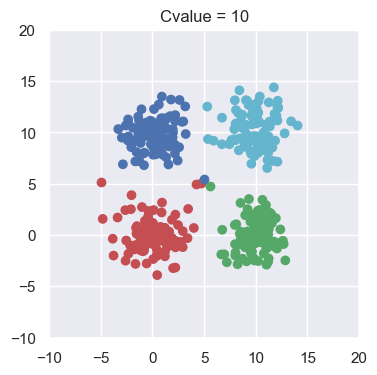

Cvalue =  100 train time = 0.001512765884399414
Point 1 is predicted in class 1, all probability as below [0.53883488 0.00070587 0.45573906 0.00472019]
Point 2 is predicted in class 3, all probability as below [0.30204568 0.19353613 0.31204397 0.19237422]
Point 3 is predicted in class 2, all probability as below [0.26876734 0.33802164 0.1893696  0.20384142]
Point 4 is predicted in class 3, all probability as below [0.34763543 0.14601003 0.35613049 0.15022405]
Point 5 is predicted in class 3, all probability as below [0.22583327 0.21019949 0.30444377 0.25952348]


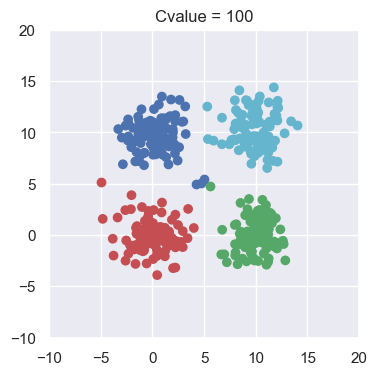

Cvalue =  1000 train time = 0.0013778209686279297
Point 1 is predicted in class 1, all probability as below [0.52649403 0.00074742 0.46792086 0.00483768]
Point 2 is predicted in class 3, all probability as below [0.29153665 0.20280035 0.30076107 0.20490193]
Point 3 is predicted in class 2, all probability as below [0.25448496 0.35157468 0.17911205 0.21482831]
Point 4 is predicted in class 3, all probability as below [0.33610609 0.1530169  0.35088941 0.1599876 ]
Point 5 is predicted in class 3, all probability as below [0.21883671 0.21772104 0.28741147 0.27603078]


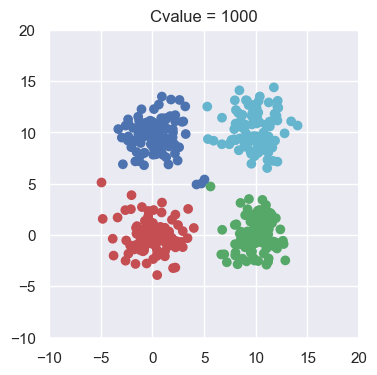

Cvalue =  10000 train time = 0.002104043960571289
Point 1 is predicted in class 1, all probability as below [0.50580027 0.0007505  0.48877571 0.00467352]
Point 2 is predicted in class 3, all probability as below [0.28656238 0.20229358 0.30983853 0.20130552]
Point 3 is predicted in class 2, all probability as below [0.25306865 0.3524029  0.18456529 0.20996316]
Point 4 is predicted in class 3, all probability as below [0.32808777 0.15189273 0.36269638 0.15732313]
Point 5 is predicted in class 3, all probability as below [0.21596858 0.21966398 0.29431938 0.27004806]


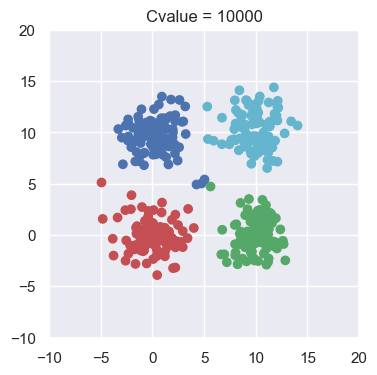

Cvalue =  100000 train time = 0.0011861324310302734
Point 1 is predicted in class 1, all probability as below [0.55401232 0.00075191 0.43978981 0.00544596]
Point 2 is predicted in class 3, all probability as below [0.30466601 0.19438873 0.30675455 0.19419071]
Point 3 is predicted in class 2, all probability as below [0.26921544 0.33951482 0.18474239 0.20652735]
Point 4 is predicted in class 1, all probability as below [0.35182845 0.14675058 0.34916268 0.15225829]
Point 5 is predicted in class 3, all probability as below [0.22737799 0.21186285 0.30120395 0.25955522]


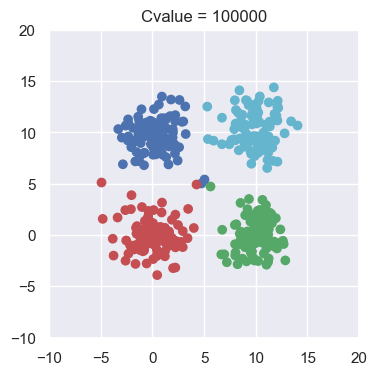

In [4]:
random.seed(2019)
N = 100
SD = 1.5
X = random.randn(N, 2) * SD + [0, 0]
XX = random.randn(N, 2) * SD + [10, 0]
XXX = random.randn(N, 2) * SD + [0, 10]
XXXX = random.randn(N, 2) * SD + [10, 10]
X = np.concatenate((X, XX, XXX, XXXX))

y = [0] * N
yy = [1 ] * N
yyy = [2 ] * N
yyyy = [3 ] * N
y = np.append(y, yy)
y = np.append(y, yyy)
y = np.append(y, yyyy)

xmin=-12; xmax=20
ymin=-10; ymax=20
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=y) #點

PredictPoints = []
PredictPoints = PredictPoints + [[-5, 5.2], [4.7, 5.1], [5.6, 4.8], [4.2, 5], [5, 5.5]]
PredictPoints = np.array(PredictPoints)

for Cvalue in (0.01, 0.1, 1, 10, 100, 1000, 10000, 100000):
    IsLinear = True
    model = svm.SVC(C = Cvalue, gamma=0.1, kernel='linear', probability=True, decision_function_shape='ovo')
    time_start = time.time()
    model.fit(X, y)
    print('Cvalue = ', Cvalue, 'train time =', time.time()-time_start)
    prob = model.predict_proba(PredictPoints)
    idx = np.argmax(prob, axis = 1)
    graph(Cvalue, IsLinear, idx)